# VISÃO COMPUTACIONAL - TRATAMENTO DE IMAGENS COM OpenCV

OBJETIVO:
- Realizar práticas de visão computacional aplicadas a imagens utilizando recursos da biblioteca OpenCV.

<b> TRABALHANDO IMAGENS COM OPENCV

In [12]:
import cv2
import numpy as np
import pandas as pd

In [16]:
imagem = cv2.imread('C:/Users/sylvi/londonBridge.jpg')

In [17]:
print(imagem)

[[[210 174 168]
  [208 173 169]
  [209 174 170]
  ...
  [164  94   1]
  [164  94   1]
  [164  94   1]]

 [[209 175 169]
  [209 174 170]
  [209 174 170]
  ...
  [163  94   1]
  [163  94   1]
  [163  94   1]]

 [[209 175 169]
  [209 175 169]
  [210 175 171]
  ...
  [163  94   1]
  [163  94   1]
  [163  94   1]]

 ...

 [[125 119 174]
  [125 119 174]
  [126 120 175]
  ...
  [ 94  66  32]
  [ 94  66  32]
  [ 94  66  32]]

 [[126 119 170]
  [126 119 170]
  [127 120 171]
  ...
  [ 93  65  31]
  [ 93  65  31]
  [ 93  65  31]]

 [[126 120 169]
  [126 120 169]
  [126 120 169]
  ...
  [ 93  65  31]
  [ 93  65  31]
  [ 93  65  31]]]


In [18]:
imagem.shape #Altura, Largura, Canais/Camadas de Cores

(152, 332, 3)

In [19]:
#Mostrando/'Traduzindo' algumas informações básicas Shape:
print("Altura: {} pixels".format(imagem.shape[0]))
print("Largura: {} pixels".format(imagem.shape[1]))
print("Canais de Cores: {} pixels".format(imagem.shape[2]))

Altura: 152 pixels
Largura: 332 pixels
Canais de Cores: 3 pixels


In [20]:
#Mostrando a imagem dentro do OpenCV e fechando janelas:
cv2.imshow('Imagem', imagem)
cv2.waitKey(0) #aguarda uma tecla a ser pressionada para fechar a imagem que foi aberta
cv2.destroyAllWindows()  #Fecha a janela aberta

In [21]:
#Salvando uma cópia da imagem:
cv2.imwrite("C:/Users/sylvi/copialondonBridge.jpg", imagem)

True

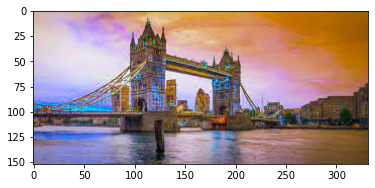

In [29]:
#Mostrando imagens dentro do Jupyter Notebook via matplotlib:
import matplotlib.pyplot as plt
plt.imshow(imagem)
plt.show()

- O OpenCV salva as imagens por default em formato BGR ao invés de RGB. Por isso, as imagens lidas via cv2 e carregadas dentro do Jupyter ficam com cores distorcidas: o BGR inverte a escala RGB, distorcendo as cores da imagem.
- Para resolver este 'problema', utilizamos o comando 'cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)': faz com que o OpenCV armazene a imagem em formato RGB ao invés de BGR.

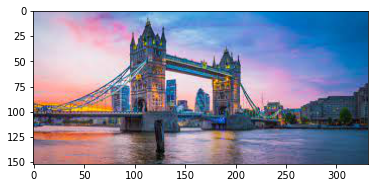

In [30]:
#Corrigindo distorção de cores, convertendo imagem BGR em RGB:
imagemRGB = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagemRGB)
plt.show()

In [31]:
#Splitting e Merging

#Separando a imagem em cada camada B,G,R:
(b, g, r) = cv2.split(imagem)

#Visualizando cada uma destas camadas separadamente zerando as demais camadas:
import numpy as np
zeros = np.zeros(imagem.shape[:2], dtype='uint8') #Cria matriz de 2 dimensões(altura e largura) preenchida de zeros.

cv2.imshow("Vermelho", cv2.merge([zeros, zeros, r])) #Separando camada/canal de cor por camada/canal de cor:
cv2.imshow("Verde", cv2.merge([zeros, g, zeros]))
cv2.imshow("Azul", cv2.merge([b, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()  #Mostra imagem com camada de cor específica

In [35]:
#Unindo/merging novamente a imagem juntando cada etapa separada:
merge = cv2.merge([b, g, r])
cv2.imshow("Merged", merge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
#Transformando imagem em escala de cinza:
imagemCinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

cv2.imshow("Escala de Cinza", imagemCinza)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
imagemCinza.shape  #Apenas duas dimensões da imagem

(152, 332)

In [39]:
#Tratando de um pixel específico:
(b, g, r) = imagem[150, 7]  #pixel localizado na posição 150, 7
print("O pixel localizado na posição [80, 7] possui as seguintes cores:{}, {}, {}".format(r, g, b))

O pixel localizado na posição [80, 7] possui as seguintes cores:172, 121, 128


In [40]:
#Visualizando este pixel específico:
cv2.imshow("Imagem pixel 80, 7", imagem[80, 7])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
#Mudando o valor de um pixel:
imagem[80, 7] = (120, 8, 14)
(b, g, r) = imagem[80, 7]
print("O pixel localizado na posição [80, 7] possui as seguintes cores:{}, {}, {}".format(r, g, b))

O pixel localizado na posição [80, 7] possui as seguintes cores:14, 8, 120


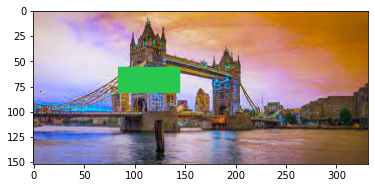

In [46]:
#Criando uma outra variável para manipular uma imagem com pixel alterado informando o comando .copy(). 
#Informando este comando 'copy' impede que as alterações feitas em imagem pintada impactem a imagem principal base.
imagemPintada = imagem.copy()
imagemPintada[56:82, 84:146] = (40, 200, 80)


imagemPintadaRGB = cv2.cvtColor(imagemPintada, cv2.COLOR_BGR2RGB)


plt.imshow(imagemPintada)
plt.show()

In [47]:
#Visualizando imagem Pintada com OpenCV:
cv2.imshow('Imagem com Pixel alterado', imagemPintada)
cv2.waitKey(0)
cv2.destroyAllWindows()

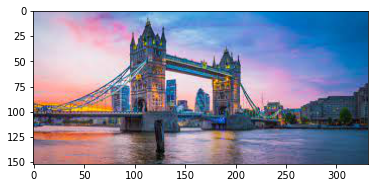

In [48]:
#Imagem original intacta
plt.imshow(imagemRGB)
plt.show()

<b>DESENHANDO IMAGENS COM O OPENCV

In [50]:
import numpy as np
#Tela em branco 500x500 com 3 pixels:
espaço = np.zeros((500,500,3), dtype = 'uint8')

#Linha verde do canto superior esquerdo até o canto inferior direito
verde = (0, 255, 0)  #apenas o meio "g"(green) está preenchido 
cv2.line(espaço, (0,0), (500,500), verde)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

#Linha vrmelha com 3 pixels de espessura do canto inferior esquerdo até a parte superior direita
vermelho = (0, 0, 255)  #apenas o 'r'(red) ´reenchido 
cv2.line(espaço, (500,0), (0, 500), vermelho, 3)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

#Quadrado verde de 40x40 pixels começando em 20x20 e terminando em 60x60
cv2.rectangle(espaço, (20,20), (60,60), verde)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

#Retângulo vermelho com 5 pixel de espessura
cv2.rectangle(espaço, (10,150), (100,300), vermelho, 5)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

#Retângulo azul todo preenchido
azul = (255, 0, 0)  #apenas o meio "b"(blue) está preenchido 
cv2.rectangle(espaço, (400,80), (480,160), azul, -1)  #-1 = preenchimento completo, sem transparência no fundo
cv2.imshow("Figura", espaço)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [53]:
#Sequência de círculos brancos no centro da tela com loop:
espaço2 = np.zeros((500,500,3), dtype='uint8')
(centro_x, centro_y) = (espaço2.shape[1]//2, espaço2.shape[0]//2) #Separando tela em branco em dua partes iguais

branco = (255, 255, 255)

for raio in range(0, 250, 25):
    cv2.circle(espaço2, (centro_x, centro_y), raio, branco)


cv2.imshow("Figura", espaço2)
cv2.waitKey(0)
cv2.destroyAllWindows()

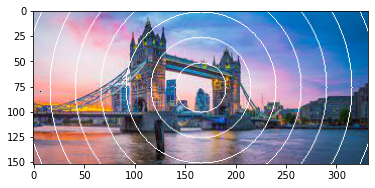

In [54]:
#Desenhando em cima da imagem:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
(centro_x, centro_y) = (imagem_rgb.shape[1]//2, imagem_rgb.shape[0]//2) #Separando tela em branco em dua partes iguais

branco = (255, 255, 255)

for raio in range(0, 250, 25):
    cv2.circle(imagem_rgb, (centro_x, centro_y), raio, branco)


plt.imshow(imagem_rgb)
plt.show()

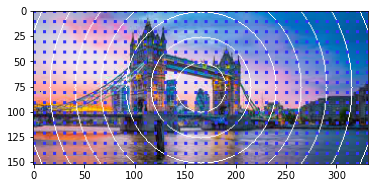

In [56]:
#Outro exemplo de desenho sequencial em cima de uma imagem (que pode ser utilizado como ruído artificial criado para testar
#ainda mais a acurácia do algoritmo):

for y in range(0, imagem_rgb.shape[0], 10):
    for x in range(0, imagem_rgb.shape[1], 10):
        imagem_rgb[y:y+3, x:x+3] = (50, 50, 250)

plt.imshow(imagem_rgb)
plt.show()

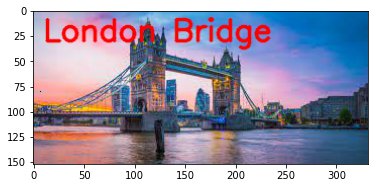

In [58]:
#Escrevendo na imagem:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
fonte = cv2.FONT_HERSHEY_SIMPLEX   #tipo de fonte
linha = cv2.LINE_AA   #tipo de linha da fonte
cv2.putText(imagem_rgb, 'London Bridge', (10, 30), fonte, 1, (255,0,0), 2, linha)
#imagem + texto + localização inicial + tipo de fonte + tamanho/escala de fonte + cor + espessura da linha + tipo de linha

plt.imshow(imagem_rgb)
plt.show()

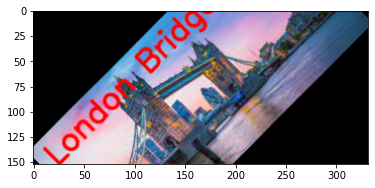

In [59]:
#Rotacionando uma imagem:

#Obtendo as dimensões da imagem e seu centro:
(altura, largura) = imagem_rgb.shape[:2]
centro = (largura//2, altura//2)  #centro: ponto a partir do qual a figura gira em torno

#Rotacionando a imagem em 45 graus:
rot = cv2.getRotationMatrix2D(centro, 45, 1.0) #(centro, ângulo de rotação, escala (zoom))
rotacionado = cv2.warpAffine(imagem_rgb, rot, (largura, altura)) #imagem, parâmetros para rotacionar, dimensões da nova imagem de saída
plt.imshow(rotacionado)
plt.show()

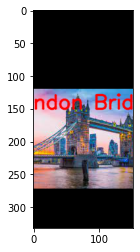

In [61]:
#Deslocando imagem:

#Obtendo dimensões da imagem:
(altura, largura) = imagem_rgb.shape[:2]

import numpy as np
paramDesloc = np.float32([[1, 0, -46],[0, 1, 120]]) #movendo 46 pixels para a esquerda e 120 pixels para baixo
desloc = cv2.warpAffine(imagem_rgb, paramDesloc, (altura, largura))
plt.imshow(desloc)
plt.show()

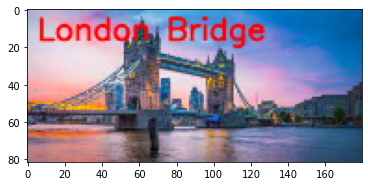

In [62]:
#Redimensionando imagem/ Mudando quantidade de pixels da imagem:
(altura, largura) = imagem_rgb.shape[:2]
nova_largura = 180

#Definindo 180 pixels de largura, mantendo a proporção da imagem:
proporção = altura / largura
nova_dim = (nova_largura, int(nova_largura*proporção))

#Executando o redimensionamento:
redimensionada = cv2.resize(imagem_rgb, nova_dim, interpolation = cv2.INTER_LINEAR) 
plt.imshow(redimensionada)
plt.show()

#INTERPOLAÇÃO: ESCOLHA DA MANEIRA DE QUAIS PIXELS SERÃO MANTIDOS, ESCOLHA DOS CÁLCULOS DE REDIMENSIONAMENTO DOS PIXELS
#EXISTEM 4 OPÇÃO DE INTERPOLAÇÃO: INTER_LINEAR, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4. INTER_LINEAR É A MAIS RÁPIDA,
#COM MENOS QUALIDADE. #INTER_AREA = INDICADA PARA PROCESSAMENTO EM MAIS IMAGENS. AS OUTRAS TÊM RESULTADOS SEMELHANTES.

In [63]:
redimensionada.shape

(82, 180, 3)

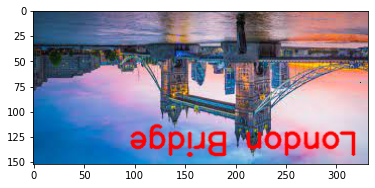

In [65]:
#Invertendo uma imagem / Fliping

#Flip horizontal e vertical:
flipped = cv2.flip(imagem_rgb, -1) #1= Horizontal, 0=Vertical, -1=horizontal e vertical
plt.imshow(flipped)
plt.show()

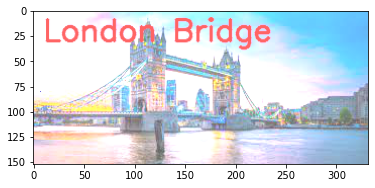

In [67]:
#Distorcendo as características da imagem:
import numpy as np

#Cria-se uma matriz com as mesmas dimensões da imagem e multiplica-se cada pixel por umv aloe (ex: cada pixel = 100)
matriz = np.ones(imagem_rgb.shape, dtype='uint8') * 100
soma = cv2.add(imagem_rgb, matriz)  #A soma dos pixels com os valores deixam a imagem mais forte, com mais brilho
plt.imshow(soma)
plt.show()

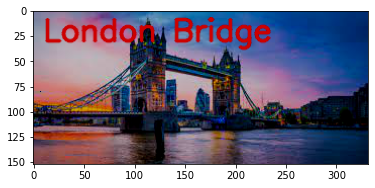

In [68]:
matriz = np.ones(imagem_rgb.shape, dtype='uint8') * 50
subtração = cv2.subtract(imagem_rgb, matriz) #Subtrai-se os pesos/valores dos pixels, tornando a imagem menos clara
plt.imshow(subtração)
plt.show()

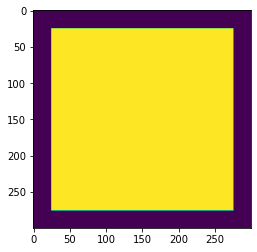

In [77]:
#Operações Bitwise - AND, OR, XOR and NOT

#Desenhando um retângulo:
tela1 = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(tela1,(25,25), (275,275), 255, -1)
plt.imshow(tela1)
plt.show()

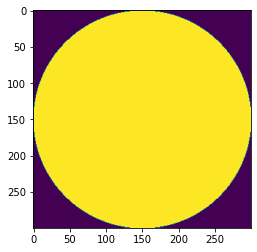

In [87]:
#Desenhando um círculo:
tela2 = np.zeros((300, 300), dtype="uint8")
cv2.circle(tela2,(150,150), 150, 150, -1)
plt.imshow(tela2)
plt.show()

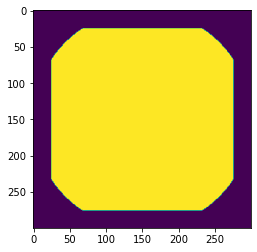

In [88]:
#Operações Lógicas:
bitwise_AND = cv2.bitwise_and(tela1, tela2) #Aplicando a operação AND: as duas precisam ser 1 para saída = 1

plt.imshow(bitwise_AND)
plt.show()

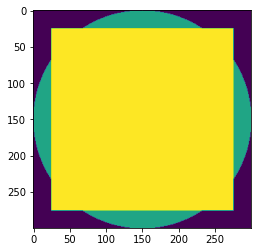

In [89]:
bitwise_OR = cv2.bitwise_or(tela1, tela2)  #Aplicando a operação OR: uma das duas imagens precisa ser 1 para saída = 1

plt.imshow(bitwise_OR)
plt.show()

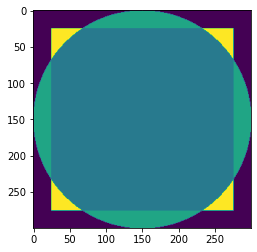

In [90]:
bitwise_XOR = cv2.bitwise_xor(tela1, tela2) #Aplicando a operação XOR: se duas imagens=1 saída=0

plt.imshow(bitwise_XOR)
plt.show()

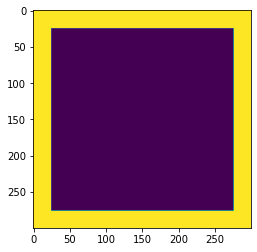

In [91]:
bitwise_NOT = cv2.bitwise_not(tela1, tela2) #Aplicando a operação NOT: inverte a saída. Entrada=0 saída=1 e vice-versa

plt.imshow(bitwise_NOT)
plt.show()

- Máscaras de imagens: uma região da imagem que queremos coletar, isolar. É como se fosse um crop, mas mantendo a dimensão total da imagem original.

In [92]:
#Criando primeira máscara retângulo para a imagens: 
mask1 = np.zeros(imagem_rgb.shape[:2], dtype='uint8')  #informa dimensão da imagem base
(cX, cY) = (imagem_rgb.shape[1]//2, imagem_rgb.shape[0]//2) #define o centro da imagem
cv2.rectangle(mask1, (cX-80, cY-20), (cX+80, cY+20), 255, -1) #cria um retângulo a partir do centro da imagem: 150px pra direita e 150px pra esquerda

#Aplicando máscara retangular:
mask1Aplicada = cv2.bitwise_and(imagem_rgb, imagem_rgb, mask=mask1) #compara duas amostras da imagem e retorna o resultado na máscara(região que queremos isolar da imagem)

#Criando uma segunda máscara circular com um raio de 100 pixels:
mask2 = np.zeros(imagem_rgb.shape[:2], dtype='uint8')
cv2.circle(mask2, (cX, cY), 120, 255, -1)
mask2Aplicada = cv2.bitwise_and(imagem_rgb, imagem_rgb, mask = mask2)

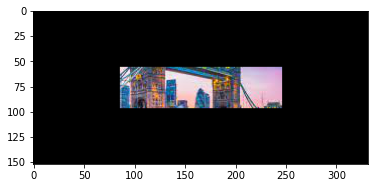

In [93]:
plt.imshow(mask1Aplicada)
plt.show()

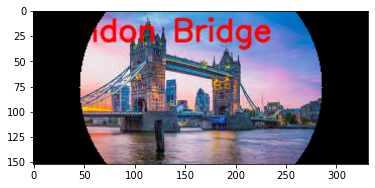

In [94]:
plt.imshow(mask2Aplicada)
plt.show()

HISTOGRAMAS PARA IMAGENS:

Da mesma maneira que no pré-processamento do dataset em que plotamos boxplots e histogramas para ver outliers, criamos histogramas também para identificar os pontos onde os pixels estão mais ativos ou mais fracos, para identificar a distribuição de intensidade dos pixels. Desta forma, podemos a partir desta visualização dos pixels 'fora da curva', decidir se desejamos 'ajustar' melhor a imagem para a leitura da rede neural suavizando pixels mais fortes e/ou normalizando áreas mais fracas.
Podemos visualizar os histogramas via cv2, matplotlib e até mesmo pandas.

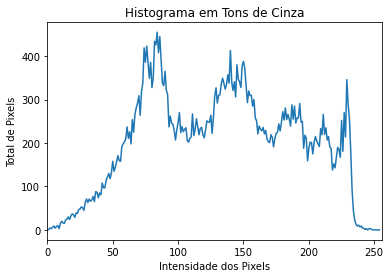

In [95]:
#Convertendo BGR para Gray Scale:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

#Criando histograma:
hist = cv2.calcHist(images=[imagem_cinza], channels=[0], mask=None, histSize=[255], ranges=[0, 255])

#Mostrando o histograma:
plt.figure()
plt.title('Histograma em Tons de Cinza')
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Total de Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

EQUALIZANDO e FILTRANDO A IMAGEM:

Podemos aplicar filtros para uma equalização('normalização') e ajustes da imagem, considerando os ruídos encontrados nela. Para ruídos do tipo 'salt and pepper' (sal e pimenta) por exemplo, podemos substituir os outliers por medianas. No caso de imagens com outros tipos de ruídos, inserimos médias para ajuste dos outliers. A função da equalização de imagens é para distribuir de forma mais uniforme as intensidades dos pixels da imagem.

In [96]:
#Convertendo BGR para GrayScale:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

#Criando um histograma equalizado:
histEqual = cv2.equalizeHist(imagem_cinza)

#Mostrando as imagens:
cv2.imshow("Imagem Original", imagem_cinza)
cv2.imshow("Imagem Equalizada", histEqual)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Podemos notar algumas diferenças de ajustes na intensidade dos pixels entre a imagem original e a equalizada

In [98]:
#Filtros de imagens: medias e medianas
imagemComRuído = cv2.imread('C:/Users/sylvi/Saltandpepper.jpg')
cv2.imshow("Imagem com ruído Salt and Pepper", imagemComRuído)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [103]:
#Utilizando a mediana (ao redor do pixel central) com 'medianBlur' para tratar ruídos 'salt and pepper'.
#Comparando diferentes kernels:
ruido3 = cv2.medianBlur(imagemComRuído, 3) #Kernel 3x3.
ruido5 = cv2.medianBlur(imagemComRuído, 5)
ruido7 = cv2.medianBlur(imagemComRuído, 7)
cv2.imshow("Imagem com ruído Salt and Pepper", imagemComRuído)
cv2.imshow("Kernel 3x3", ruido3)
cv2.imshow("Kernel 5x5", ruido5)
cv2.imshow("Kernel 7x7", ruido7)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [105]:
#Utilizando a média (substitui o pixel central pela média dos pixels vizinhos) para tratar ruídos com 'blur':
media3 = cv2.blur(imagemComRuído,(3,3)) #Kernel 3x3. 
media5 = cv2.blur(imagemComRuído, (5,5))
media7 = cv2.blur(imagemComRuído, (7,7))
cv2.imshow("Imagem com ruído Salt and Pepper", imagemComRuído)
cv2.imshow("Kernel 3x3", ruido3)
cv2.imshow("Kernel 5x5", ruido5)
cv2.imshow("Kernel 7x7", ruido7)
cv2.waitKey(0)
cv2.destroyAllWindows()

Método GaussianBlur:

Substitui o pixel central por uma média ponderada dos pixels vizinhos, dando mais peso para os pixels mais próximos.
Chamado de Gaussian Blur pois utiliza a função gaussiana para determinar os pesos de cada pixel (quanto mais distante, menor o peso). Para o método Gaussian Blur devemos informar o desvio padrão a ser utilizado na função gaussiana: quanto maior o valor, mais borrada ficará a imagem especialmente quanto maior for o valor das dimensões do kernel.

In [106]:
#Aplicação filtragem Gaussian Blur:
gaus1 = cv2.GaussianBlur(imagemComRuído,(3,3), 0) #Kernel 3x3. Desvio padrão = 0.
gaus2 = cv2.GaussianBlur(imagemComRuído, (3,3), 1) #Kernel 3x3. Desvio padrão = 1.
gaus3 = cv2.GaussianBlur(imagemComRuído, (5,5), 0) #Kernel 5x5. Desvio padrão = 0.
gaus4 = cv2.GaussianBlur(imagemComRuído, (5,5), 1) #Kernel 5x5. Desvio padrão = 1.
cv2.imshow("Imagem com ruído Salt and Pepper", imagemComRuído)
cv2.imshow("Kernel 3x3 - std 0",gaus1)
cv2.imshow("Kernel 3x3 - std 1",gaus2)
cv2.imshow("Kernel 5x5 - std 0", gaus3)
cv2.imshow("Kernel 5x5 - std 1",gaus4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [108]:
#Testando apenas o kernel 7x7 com Gaussian de diferentes devio padrão:
gaus5 = cv2.GaussianBlur(imagemComRuído, (7,7), 0) #Kernel 7x7. Desvio padrão = 0.
gaus6 = cv2.GaussianBlur(imagemComRuído, (7,7), 1) #Kernel 7x7. Desvio padrão = 1.
gaus7 = cv2.GaussianBlur(imagemComRuído, (7,7), 2) #Kernel 7x7. Desvio padrão = 2.

cv2.imshow("Imagem com ruído Salt and Pepper", imagemComRuído)
cv2.imshow("Kernel 7x7 - std 1",gaus5)
cv2.imshow("Kernel 7x7 - std 0", gaus6)
cv2.imshow("Kernel 7x7 - std 2",gaus7)
cv2.waitKey(0)
cv2.destroyAllWindows() 

TÉCNICAS PARA MUDAR A FORMA DA IMAGEM:

- Erosão: técnica de remover pixels perto dos limites de um objeto com objetivo de ressaltar este objeto. Tendência a escurecer áreas, pois há uma redução de pixels.
- Dilatação: o contrário da erosão, adiciona-se pixels próximos aos limites de um objeto com o objetivo de preencher pontos faltantes. Pode ser usada tanto para preencher lacunas indesejadas, como também para ampliar pequenos detalhes da imagem.Tendência a clarear áreas, pois há uma ampliação de pixels e de brilho.
- Opening: aplicação de erosão --> aplicação de dilatação em seguida. Muito útil para reduzir ruídos mais claros e 'salt' em cenários de 'salt and pepper'.
- Closing: aplicação de dilatação --> aplicação de erosão em seguida. Muito útil para reduzir ruídos mais escuros e 'pepper' em cenários de 'salt and pepper'.
- Gradiente Morfológico(Morphological Gradient): diferença entre dilatação e erosão de uma imagem, nos retorna os contornos dos pontos mais fortes/ativos da figura.

In [109]:
#Erosão:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
erosão = cv2.erode(imagem_cinza.copy(), (5,5), iterations=3) #imagem, tamanho kernel, número de iterações de aplicação de erosão
cv2.imshow('Imagem Cinza', imagem_cinza)
cv2.imshow('Exemplo: erosão', erosão)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [110]:
#Dilatação:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
dilatação = cv2.dilate(imagem_cinza.copy(), (5,5), iterations=3) #imagem, None(kernel default 3x3), nº iterações de aplicação de dilatação
cv2.imshow('Imagem Cinza', imagem_cinza)
cv2.imshow('Exemplo: erosão', dilatação)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [113]:
#Opening:
opening  = cv2.morphologyEx(imagemComRuído, cv2.MORPH_OPEN, None)
cv2.imshow('Salt and Pepper', imagemComRuído)
cv2.imshow('Exemplo: opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [115]:
#Closing:
closing = cv2.morphologyEx(imagemComRuído, cv2.MORPH_CLOSE, None)
cv2.imshow('Salt and Pepper', imagemComRuído)
cv2.imshow('Exemplo: closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [116]:
#Morphological Gradient:
morfGrad = cv2.morphologyEx(imagem_cinza, cv2.MORPH_GRADIENT, None)
cv2.imshow('Exemplo: Gradiente Morfolçogico', morfGrad)
cv2.waitKey(0)
cv2.destroyAllWindows()

CANNY EDGE DETECTOR:

Técnica para identificar as bordas contidas em uma imagem, a partir das mudanças detectadas no gradiente de uma imagem.
Calcula-se os gradientes gX e gY(magnitue e ângulo)
Definem-se dois valores de limite. Logo, qualquer valor acima do valor limite é considerado como borda e qualquer valor abaixo é desconsiderado. Valores intermediários são considerados uma borda se estiverem conectados com valores limite altos.
OBS: Seleciona-se o máximo dos locais para detecções em um mesmo sentido.

Em algumas ocasiões é melhor aplicar filtros nas imagens primeiramente para eliminar ruídos e depois tentar detectar as bordas com Canny Edge. Em outros casos, caso queira detectar mais bordas (incluindo boras dos próprios ruídos) dentro da imagem, é interessante aplicar Canny Edge na imagem crua sem filtros.

In [118]:
#Criando e mostrando imagem com filtro:
imagemFiltrada = cv2.GaussianBlur(imagem_cinza, (5,5), 0)
cv2.imshow('Imagem com Filtro', imagemFiltrada)
cv2.waitKey(0)

#Aplicando filtros Canny Edge na imagem filtrada com diferentes limiares:
limiteGrande = cv2.Canny(imagemFiltrada, 50,220)
limiteMédio = cv2.Canny(imagemFiltrada, 70,10)
limitePequeno = cv2.Canny(imagemFiltrada, 190,200)

cv2.imshow("Limite Grande", limiteGrande)
cv2.waitKey(0)
cv2.imshow("Limite Médio", limiteMédio)
cv2.waitKey(0)
cv2.imshow("Limite Pequeno", limitePequeno)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [119]:
#Aplicando filtros Canny Edge com diferentes limiares em imagem sem filtro:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

limiteGrande2 = cv2.Canny(imagem_cinza, 50,220)
limiteMédio2 = cv2.Canny(imagem_cinza, 70,130)
limitePequeno2 = cv2.Canny(imagem_cinza, 190,200)

cv2.imshow("Limite Grande", limiteGrande2)
cv2.waitKey(0)
cv2.imshow("Limite Médio", limiteMédio2)
cv2.waitKey(0)
cv2.imshow("Limite Grande", limitePequeno2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<b>FIM